# **Generative AI:**
<font size=5>**A06: LeetCode Problems** </font>


In [ ]:
# Problem Statement: IPO:

# Choose at most k projects to maximize capital.
# Each project has a profit and a minimum capital requirement.
# Example Walkthrough:

# Input: k = 2, w = 0, profits = [1,2,3], capital = [0,1,1]
# Output: 4
# Explanation:

# Start with w=0 → Choose project 0 (profit 1).
# Now w=1 → Choose project 2 (profit 3).
# Final capital: 4.
# Approach:

# Sort projects by capital.
# Use a max heap to pick the most profitable project within available capital.
# Complexity Analysis:

# O(n log n) (sorting and heap operations).

In [ ]:
# #add any import statements here
import heapq
from heapq import heappush, heappop

##**Section 01: Your Solution**

In [14]:
def findMaximizedCapital(k, w, profits, capital):
    """
    :type k: int
    :type w: int
    :type profits: List[int]
    :type capital: List[int]
    :rtype: int
    """
    n = len(profits)
    projects = [[capital[i], profits[i]] for i in range(n)]
    projects.sort()
    current_capital = w
    used = [False] * n

    # print(current_capital)
    # print(projects)

    for iteration in range(k):
        max_profit = 0
        max_profit_index = -1
        for i in range(n):
            if not used[i] and projects[i][0] <= current_capital:
                if projects[i][1] > max_profit:
                    max_profit = projects[i][1]
                    max_profit_index = i
                    # print(projects[i][0])

        if max_profit_index == -1:
            print("No project")
            break

        used[max_profit_index] = True
        current_capital += projects[max_profit_index][1]

    return current_capital

In [15]:
findMaximizedCapital(2, 0, [1,2,3], [0,1,1])

4

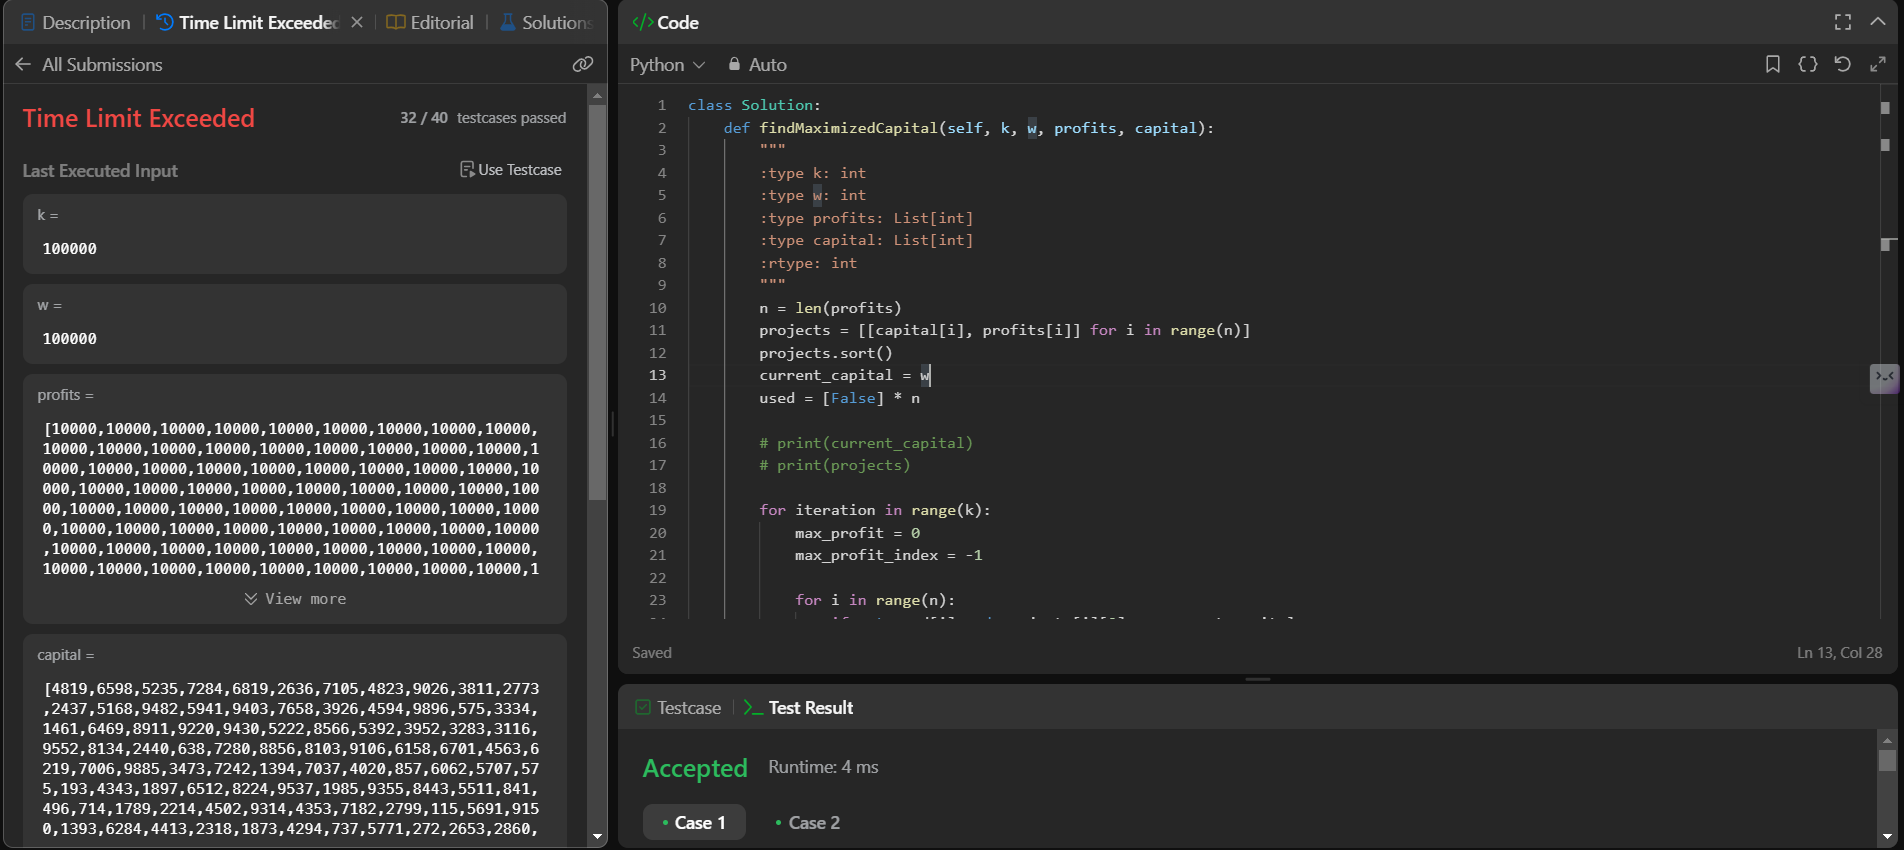

##Analysis:

In this approach first, I paired up the capital and profits into a sorted list of projects based on their required capital. I initialized current_capital with w and used a used list to keep track of completed projects. In each iteration, I scanned through the projects to find the most profitable one that I could afford, updating my capital accordingly. If no project was affordable at any point, I printed a message and exited early. Its O(n) in complexity, which isn't the most efficient, it could be improved using a max heap (done by llms) to reduce the selection time to O(n log n). Hence due to this, not all test cases could be passed.

## **Section 02: LLM 01 (ChatGPT 4o-mini)**

In [8]:
#Add the code from your chosen LLM here

def findMaximizedCapitalgpt(k, w, profits, capital):
    """
    :type k: int
    :type w: int
    :type profits: List[int]
    :type capital: List[int]
    :rtype: int
    """

    projects = sorted(zip(capital, profits))
    max_heap = []
    i = 0
    for _ in range(k):
        while i < len(projects) and projects[i][0] <= w:
            heapq.heappush(max_heap, -projects[i][1])
            i += 1
        if not max_heap:
            break
        w += -heapq.heappop(max_heap)
    return w

In [9]:
findMaximizedCapitalgpt(2, 0, [1,2,3], [0,1,1])

4

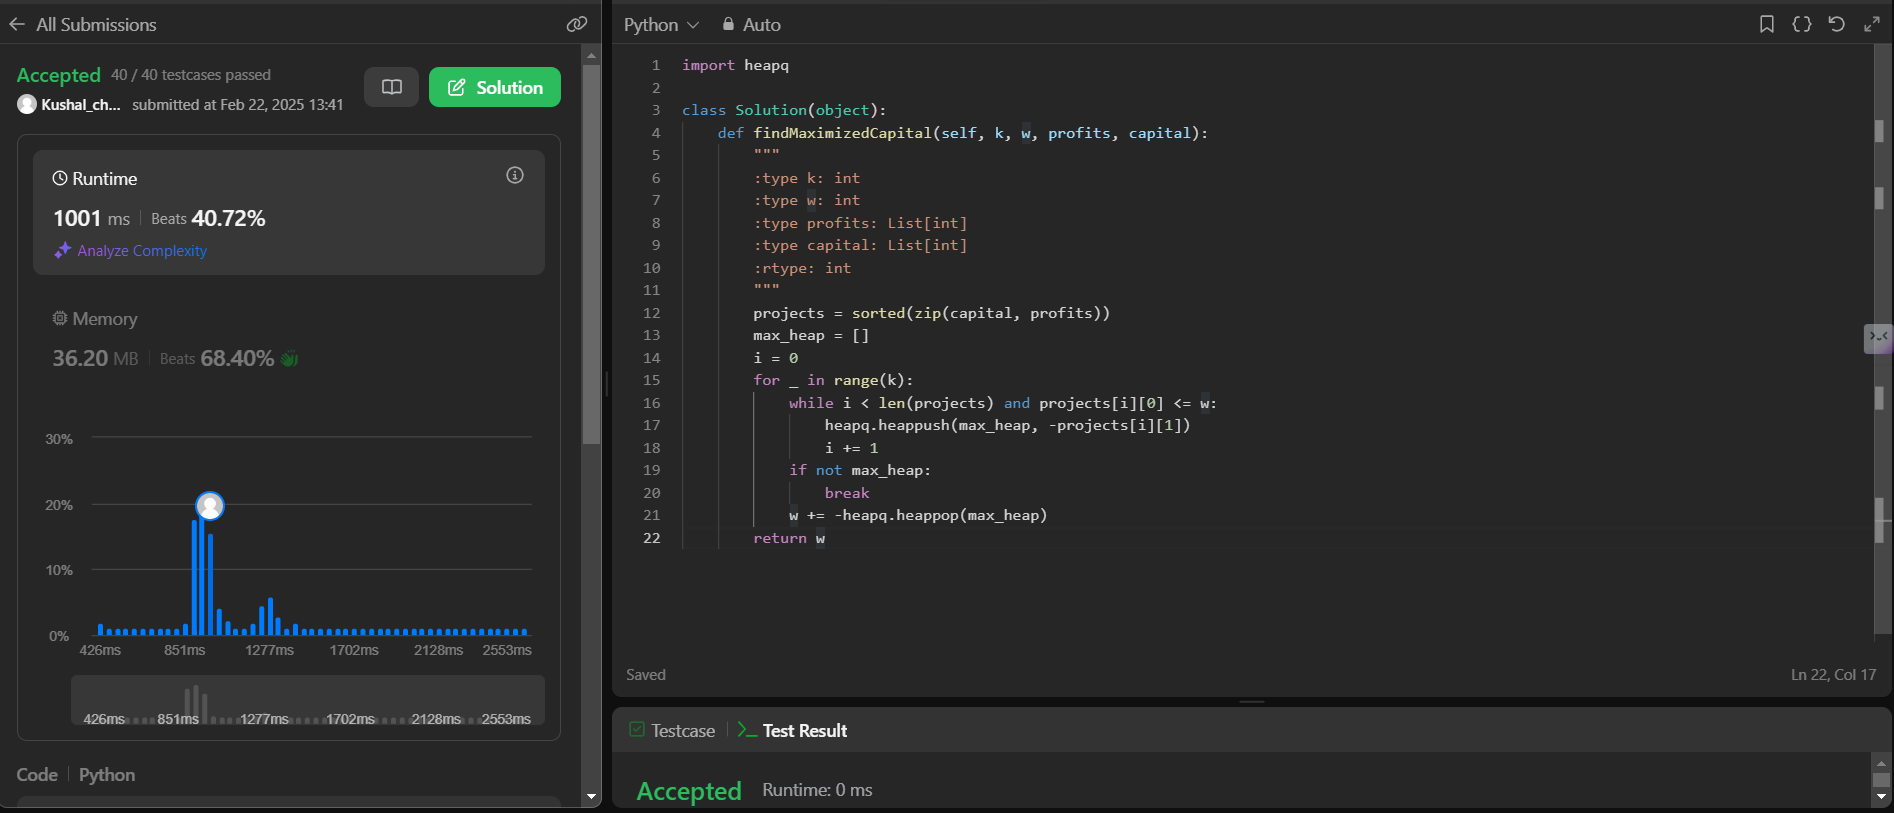

##Analysis

This function maximizes capital by selecting up to k projects using a max heap. It first sorts projects by their required capital, then iterates up to k times, pushing all affordable projects into a max heap (storing profits as negatives for max selection). The most profitable project is then selected to increase w. The process stops early if no projects are available. With a time complexity of O(n log n) due to sorting and heap operations, this approach efficiently handles investment scenarios where selecting the most profitable projects within capital constraints is key.

## **Section 03: LLM 02 (Claude 3.5 Sonnet)**

In [5]:
#Add the code from your 2nd chosen LLM here

def findMaximizedCapitalClaude(k, w, profits, capital):
    """
    :type k: int
    :type w: int
    :type profits: List[int]
    :type capital: List[int]
    :rtype: int
    """

    # If we can afford all projects, just take k highest profits
    if w >= max(capital):
        profits.sort(reverse=True)
        return w + sum(profits[:k])

    n = len(profits)
    projects = sorted(zip(capital, profits))  # Sort by capital required
    heap = []  # Max heap for profits (storing negatives)
    i = 0

    # Try to do k projects
    while k > 0:
        # Add all projects we can currently afford to the heap
        while i < n and projects[i][0] <= w:
            heappush(heap, -projects[i][1])  # Negative for max heap
            i += 1

        # If no projects are available, break
        if not heap:
            break

        # Take the highest profit project
        w -= heappop(heap)  # Remember we stored negatives
        k -= 1

    return w

In [7]:
findMaximizedCapitalClaude(2, 0, [1,2,3], [0,1,1])

4

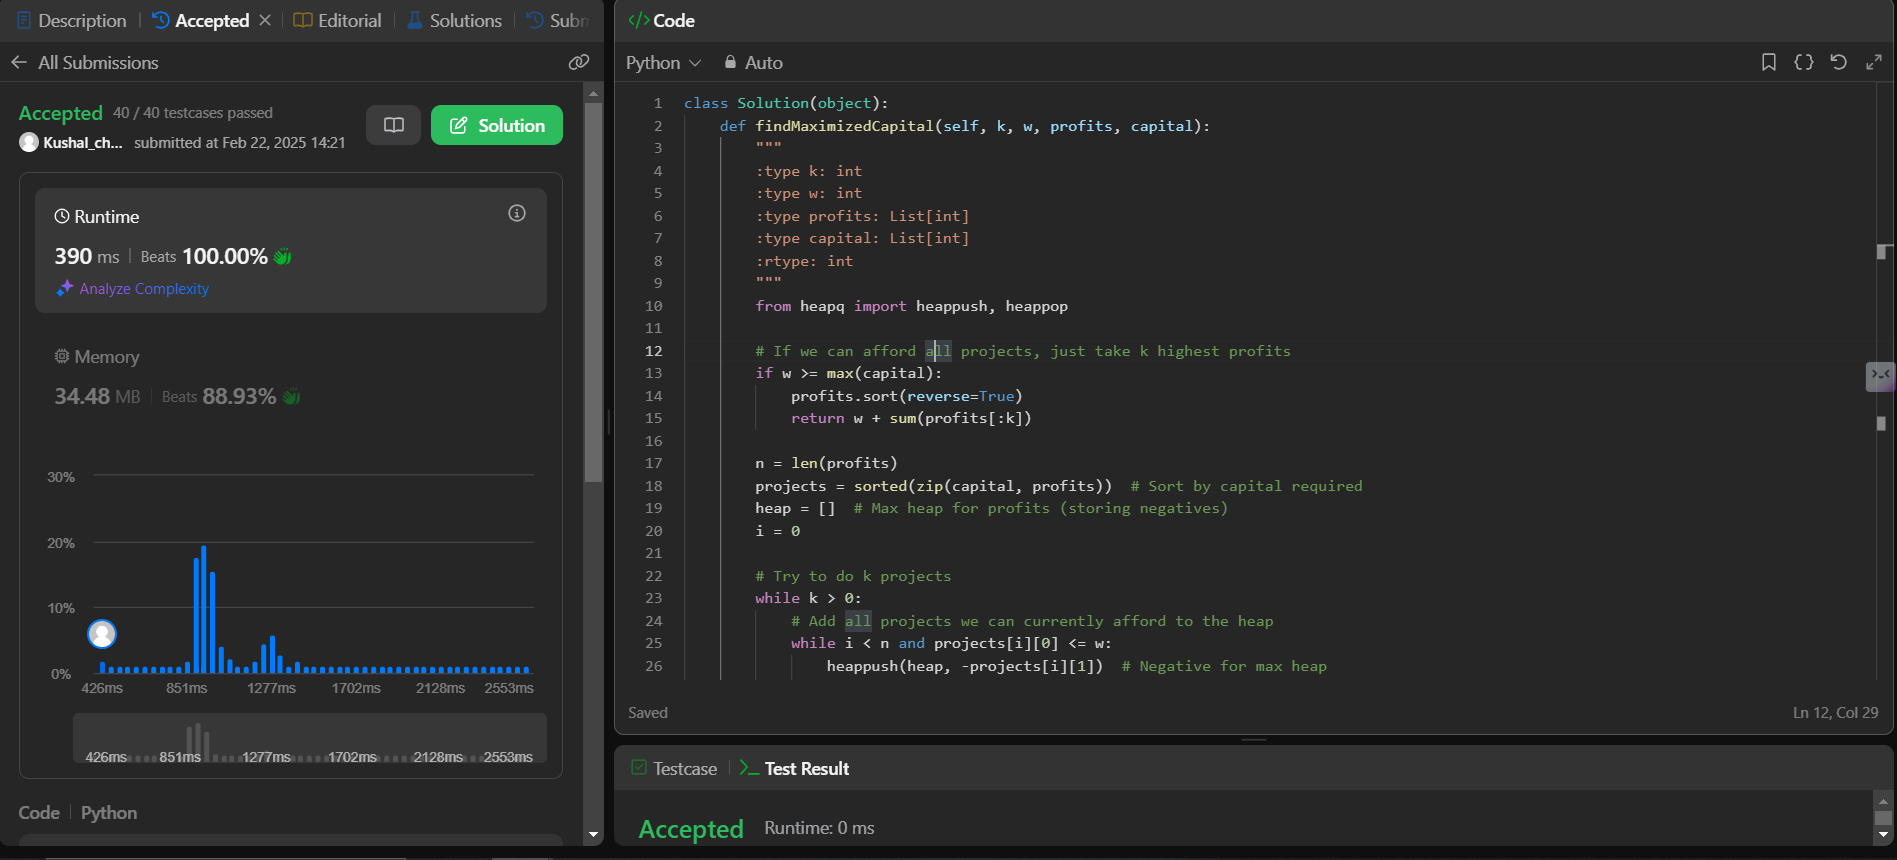

##Analysis

This function efficiently selects up to k projects to maximize capital also using a greedy approach with a max heap. It first checks if all projects are affordable from the start, in which case it directly selects the k most profitable ones. Otherwise, it sorts projects by capital, then iterates up to k times, pushing all currently affordable projects into a max heap (using negative profits for max selection). The most profitable project is chosen each time to increase w. If no projects remain, the loop breaks early. With O(n log n) complexity, this approach efficiently handles scenarios where investment decisions must be optimized within capital constraints.